# Preparing the development of a music recommender system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning

##### users.csv

**Task**: Import the *users.csv* file 

In [6]:
users = pd.read_csv("users.csv", sep=";")
users.head()

,uid,p,m1,m2,m3
0,33616,1,1136,NaN,1250.632049
1,32048,Yes,2011,NaN,2294.355415
2,29095,Yes,1486,NaN,1346.632769
3,32106,No,131,NaN,140.639993
4,31885,Yes,929,NaN,820.273301


**Task**: Rename the columns according to the description in the exercise sheet into a more readible format.

In [15]:
users.rename(columns={
    "uid" : "user_id", 
    "p" :"is_premium", 
    "m1" : "minutes_last1", 
    "m2" : "minutes_last2", 
    "m3" : "minutes_last3"
    }, inplace=True)
users.head()

,user_id,is_premium,minutes_last1,minutes_last2,minutes_last3
0,33616,NaN,1136,114.632049,1250.632049
1,32048,1.0,2011,283.355415,2294.355415
2,29095,1.0,1486,-139.367231,1346.632769
3,32106,0.0,131,9.639993,140.639993
4,31885,1.0,929,-108.726699,820.273301


**Task**: Unify the labels for the *Premium* attribute.

In [11]:
users['is_premium'] = users['is_premium'].map({'Yes': 1 , 'No': 0})
users.head()

,uid,is_premium,minutes_last1,minutes_last2,minutes_last3
0,33616,NaN,1136,NaN,1250.632049
1,32048,1.0,2011,NaN,2294.355415
2,29095,1.0,1486,NaN,1346.632769
3,32106,0.0,131,NaN,140.639993
4,31885,1.0,929,NaN,820.273301


**Task**: Impute the missing values of the attribute *Minutes2* using the values of *Minutes1* and *Minutes3*.

In [12]:
# first option
users['minutes_last2'] = users['minutes_last2'].fillna((users['minutes_last1'] + users['minutes_last3'])/2)
users.head()

# second option
mean = users['minutes_last2'].mean()
sd = users['minutes_last2'].std()

users['minutes_last2'] = mean + np.random.normal(0,1,users['minutes_last2'].shape) * sd

# third option
users['minutes_last2'].fillna(mean(users['minutes_last2']))

# forth option
users['minutes_last2'] = users['minutes_last3'] - users['minutes_last1']
users.head()

,uid,is_premium,minutes_last1,minutes_last2,minutes_last3
0,33616,NaN,1136,114.632049,1250.632049
1,32048,1.0,2011,283.355415,2294.355415
2,29095,1.0,1486,-139.367231,1346.632769
3,32106,0.0,131,9.639993,140.639993
4,31885,1.0,929,-108.726699,820.273301


##### user_behavior.csv

**Task**: Read the *user_behavior.csv* file.

In [14]:
user_behaviour = pd.read_csv("user_behavior.csv", sep=";")
user_behaviour.head()

,user_id,song_id,num_clicks,ml,g,f,mod,artists
0,29158,55060,64,251.982460,Rock,1,2023-09-22,662
1,33692,5080,63,260.001056,Pop,0,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,1,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,0,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,0,2023-04-28,8373


**Task**: Rename the columns according to the description in the exercise sheet.

In [16]:
user_behaviour.rename(columns={
    "ml" :"minutes_song", 
    "g" : "genre", 
    "f" : "is_liked", 
    "mod" : "date_change"
    }, inplace=True)
user_behaviour.head()

,user_id,song_id,num_clicks,minutes_song,genre,is_liked,date_change,artists
0,29158,55060,64,251.982460,Rock,1,2023-09-22,662
1,33692,5080,63,260.001056,Pop,0,2023-08-14,4937
2,31198,25839,24,105.355020,Hip-Hop,1,2023-06-24,6289
3,33302,87341,36,142.085267,Electronic,0,2023-07-22,1356
4,34592,47110,74,301.314994,Pop,0,2023-04-28,8373


**Task:** Fix the data types of the attributes *Genre* (categorical) and *Favorite* (binary, categorical).

In [24]:
# genre is object
# is_liked int

user_behaviour['is_liked'] = user_behaviour['is_liked'].astype('bool')
user_behaviour['genre'] = user_behaviour['genre'].astype('category')

user_behaviour.astype({
    "genre" : 'category',
    "is_liked" : 'bool'
})

user_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   user_id       10000 non-null  int64   
 1   song_id       10000 non-null  int64   
 2   num_clicks    10000 non-null  int64   
 3   minutes_song  10000 non-null  float64 
 4   genre         10000 non-null  category
 5   is_liked      10000 non-null  bool    
 6   date_change   10000 non-null  object  
 7   artists       10000 non-null  int64   
dtypes: bool(1), category(1), float64(1), int64(4), object(1)
memory usage: 489.1+ KB


**Task:** Some genres have more songs than others. Adjust the data set such that it includes only the four largest genres and the genre "Other" that summarizes all remaining genres.

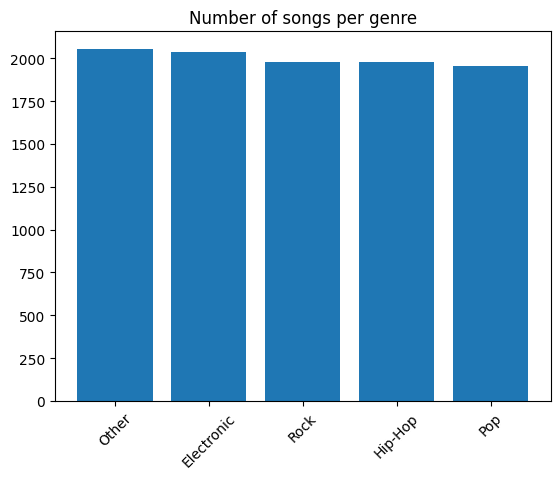

In [27]:
user_behaviour['genre'] = user_behaviour['genre'].map({
    'Electronic' : 'Electronic',
    'Rock' : 'Rock',
    'Hip-Hop' : 'Hip-Hop',
    'Pop' : 'Pop'
}).fillna('Other').astype('category')

#  other option

g = user_behaviour.genre.value_counts()[0:4]
user_behaviour['genre'] = user_behaviour.apply(lambda row: row['genre'] in g else 'Other', axis=1).astype('category')

genre_counts = user_behaviour['genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.title('Number of songs per genre')

**Task:** Create for a new column for the weekday, year, month, and day of each date names *ModifiedAt*.

In [30]:
user_behaviour['date_change'] = user_behaviour['date_change'].astype('datetime64[ns]')
user_behaviour['weekday'] = user_behaviour['date_change'].dt.day_name()
user_behaviour['year'] = user_behaviour['date_change'].dt.year
user_behaviour['month'] = user_behaviour['date_change'].dt.month
user_behaviour['day'] = user_behaviour['date_change'].dt.day
user_behaviour.head()

,user_id,song_id,num_clicks,minutes_song,genre,is_liked,date_change,artists,weekday,year,month,day
0,29158,55060,64,251.982460,Rock,True,2023-09-22,662,Friday,2023,9,22
1,33692,5080,63,260.001056,Pop,False,2023-08-14,4937,Monday,2023,8,14
2,31198,25839,24,105.355020,Hip-Hop,True,2023-06-24,6289,Saturday,2023,6,24
3,33302,87341,36,142.085267,Electronic,False,2023-07-22,1356,Saturday,2023,7,22
4,34592,47110,74,301.314994,Pop,False,2023-04-28,8373,Friday,2023,4,28


#### artists.csv

**Task**: Read the *artists.csv* file and re-name the columns according to the exercise sheet.

In [33]:
artists = pd.read_csv("artists.csv", sep=';')

artists.head()
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_id          899 non-null    int64 
 1   genre              899 non-null    object
 2   featured           899 non-null    int64 
 3   monthly_listeners  899 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 28.2+ KB


**Task:** Convert the attributes *Genre* and *Featured* to categorical variables.

In [35]:
artists['genre'] = artists['genre'].astype('category')
artists['featured'] = artists['featured'].astype('category')

### Data aggregation

**Task:** Merge the *users* and *user_behavior* tables together. Create a view in which you determine how many minutes a user listens to songs on average. Additionally, what is the highest number of clicks a user had on a song?

In [38]:
users_merged = users.merge(user_behaviour, on='user_id')
users_merged.groupby('user_id')['minutes_song'].mean()
users_merged.groupby('user_id')['num_clicks'].max()

users_merged.groupby('user_id').agg(mean_listens = ('minutes_song', 'mean'), max_clicks=('num_clicks', max)).reset_index()

/var/folders/t_/rtt328wd03b_vxchn076c4j00000gn/T/ipykernel_11679/2455044366.py:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  users_merged.groupby('user_id').agg(mean_listens = ('minutes_song', 'mean'), max_clicks=('num_clicks', max)).reset_index()


,user_id,mean_listens,max_clicks
0,27367,202.428192,95
1,27378,175.538977,97
2,27393,206.299595,98
3,27395,216.096020,91
4,27397,181.559834,99
...,...,...,...
507,37260,227.883949,99
508,37273,163.418818,98
509,37284,213.932807,96
510,37294,203.551624,98


**Task:** Merge the *user_behavior* and *artist* tables to determine the most clicked artist per genre (defined by the song).

In [42]:
artists_merged = user_behaviour.merge(artists, left_on='artists', right_on='artist_id')
artists_merged.head()

,user_id,song_id,num_clicks,minutes_song,genre_x,is_liked,date_change,artists,weekday,year,month,day,artist_id,genre_y,featured,monthly_listeners
0,33653,36293,93,387.776814,Rock,False,2023-01-24,9319,Tuesday,2023,1,24,9319,Other,0,470286
1,28163,51819,47,185.714636,Hip-Hop,False,2023-11-28,2159,Tuesday,2023,11,28,2159,Electronic,0,641610
2,37007,13430,90,381.148725,Hip-Hop,False,2023-07-25,350,Tuesday,2023,7,25,350,Other,0,437496
3,35332,48808,37,139.073250,Hip-Hop,False,2023-08-23,6160,Wednesday,2023,8,23,6160,Hip-Hop,0,703289
4,36027,7141,89,354.131396,Pop,False,2023-09-03,7842,Sunday,2023,9,3,7842,Pop,0,386512


Question: Why can't we just use artists.merge(user_behavior)?

Answer: 

Which is the most clicked artist per genre of the song?

In [52]:
group = artists_merged.groupby(['genre_x', 'artist_id']).agg(count_clicks = ('num_clicks', 'sum')).reset_index()
group[group['num_clicks'] == group.groupby('genre_x')['num_clicks'].transform('max')]

/var/folders/t_/rtt328wd03b_vxchn076c4j00000gn/T/ipykernel_11679/284529069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = artists_merged.groupby(['genre_x', 'artist_id']).agg(count_clicks = ('num_clicks', 'sum')).reset_index()


KeyError: 'num_clicks'

Answerk:

**Task**: Determine for each artist, the fan that spends the most minutes listening their music